In [1]:
# Medicações
# A, B, C, D, E

# Cada medicação tem 
# grau: subida, plato, descida
# duracao: subida, plato, descida

med1 = {'nome': 'PROLOPA 1',
        'subida1': {'grau': 0.3, 'duracao': 1}, 
        'subida2': {'grau': 1, 'duracao': 1}, 
        'plato': {'grau': -0.1, 'duracao': 3}, 
        'descida': {'grau': -0.6, 'duracao': 1}}

In [2]:
dia =  {'00': {},
        '01': {},
        '02': {'med': med1, 'dose': 100},
        '03': {},
        '04': {},
        '05': {},
        '06': {},
        '07': {'med': med1, 'dose': 100},
        '08': {},
        '09': {},
        '10': {},
        '11': {},
        '12': {},
        '13': {},
        '14': {'med': med1, 'dose': 100},
        '15': {},
        '16': {},
        '17': {},
        '18': {},
        '19': {},
        '20': {},
        '21': {},
        '22': {},
        '23': {}
}

In [3]:
# Registrar a concentração de dopamina 
dopaDia  = [0 for i in range(24*60)]
arrayDia = [i for i in range(24*60)]

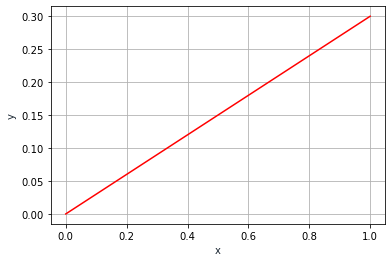

In [4]:
# Simulação do gráfico
import matplotlib.pyplot as plt
import numpy as np

horaInicial = 0
horaFinal = med1['subida1']['duracao']
duracao = horaInicial - horaFinal

x = np.linspace(horaInicial, horaFinal, (horaFinal-horaInicial)*60)
y = med1['subida1']['grau']*x
plt.plot(x, y, '-r')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.grid()
plt.show()

In [5]:
import json
import numpy as np

for hora in dia:
    minutoAtual = int(hora)*60
    x = [0]
    y = [0]
    
    horaInicial = 0
    
    if dia[hora]:
        
        subida1Grau = dia[hora]['med']['subida1']['grau']
        subida1Duracao = dia[hora]['med']['subida1']['duracao']
        horaFinal = subida1Duracao
        x = np.linspace(horaInicial, horaFinal, (horaFinal-horaInicial)*60)
        y = subida1Grau * x
               
        for i in range((horaFinal-horaInicial)*60):
            dopaDia[int(hora)*60+i] = dopaDia[int(hora)*60+i] + y[i]
            minutoAtual = minutoAtual + 1
            
        subida2Grau = dia[hora]['med']['subida2']['grau']
        subida2Duracao = dia[hora]['med']['subida1']['duracao']
        horaFinal = subida2Duracao
        x = np.linspace(horaInicial, horaFinal, (horaFinal-horaInicial)*60)
        y = subida2Grau * x + dopaDia[minutoAtual-1]
               
        for i in range((horaFinal-horaInicial)*60):
            dopaDia[(int(hora)+subida1Duracao)*60+i] = dopaDia[(int(hora)+subida1Duracao)*60+i] + y[i]
            minutoAtual = minutoAtual + 1
            
        platoGrau = dia[hora]['med']['plato']['grau']
        platoDuracao = dia[hora]['med']['plato']['duracao']
        horaFinal = platoDuracao
        x = np.linspace(horaInicial, horaFinal, (horaFinal-horaInicial)*60)
        y = platoGrau * x + dopaDia[minutoAtual-1]
               
        for i in range((horaFinal-horaInicial)*60):
            dopaDia[(int(hora)+subida1Duracao+subida2Duracao)*60+i] = dopaDia[(int(hora)+subida1Duracao+subida2Duracao)*60+i] + y[i]
            minutoAtual = minutoAtual + 1
            
        descidaGrau = dia[hora]['med']['descida']['grau']
        descidaDuracao = dia[hora]['med']['descida']['duracao']
        horaFinal = descidaDuracao
        x = np.linspace(horaInicial, horaFinal, (horaFinal-horaInicial)*60)
        y = -dopaDia[minutoAtual-1]/x[(horaFinal-horaInicial)*60-1] * x + dopaDia[minutoAtual-1]
               
        for i in range((horaFinal-horaInicial)*60):
            dopaDia[(int(hora)+subida1Duracao+subida2Duracao+platoDuracao)*60+i] = dopaDia[(int(hora)+subida1Duracao+subida2Duracao+platoDuracao)*60+i] + y[i]
            minutoAtual = minutoAtual + 1

#     y = dia[hora]['subida1']['grau']*x
#     diaItem = json.loads(dia[hora])
#     print(diaItem)

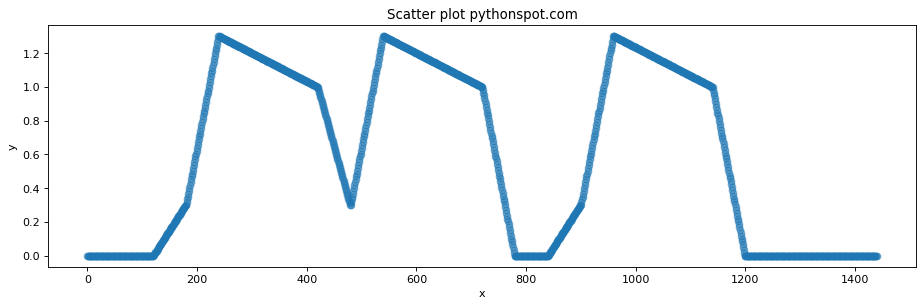

In [6]:
# Plot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(14, 4), dpi=80)

y = dopaDia
x = arrayDia

plt.scatter(x, y,alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()